https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi

In [4]:
import loompy

# Open the loom file
loom_file = "../data/HFA/GSE156793_S3_gene_count.loom"  # Replace with your loom file path

# Load the loom file
with loompy.connect(loom_file) as ds:
    # Display the first few rows and columns of the main matrix
    print("Head of the main matrix (X):")
    print(ds[:10, :10])  # Adjust the slice size as needed

    # Display some parameters of the loom file
    print("\nShape of the matrix (n_genes, n_cells):", ds.shape)
    print("Attributes (row attributes):", ds.ra.keys())
    print("Attributes (column attributes):", ds.ca.keys())
    print("Global attributes:", ds.attrs.keys())

    # Display first few entries of row and column attributes
    print("\nFirst few row attributes:")
    for key in ds.ra.keys():
        print(f"{key}: {ds.ra[key][:5]}")  # Adjust the slice size as needed

    print("\nFirst few column attributes:")
    for key in ds.ca.keys():
        print(f"{key}: {ds.ca[key][:5]}")  # Adjust the slice size as needed

    # Display global attributes
    print("\nGlobal attributes:")
    for key in ds.attrs.keys():
        print(f"{key}: {ds.attrs[key]}")


Head of the main matrix (X):
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Shape of the matrix (n_genes, n_cells): (63561, 4062980)
Attributes (row attributes): ['exon_intron', 'gene_id', 'gene_short_name', 'gene_type', 'index', 'var_names']
Attributes (column attributes): ['All_reads', 'Assay', 'Batch', 'Development_day', 'Exon_reads', 'Experiment_batch', 'Fetus_id', 'Intron_reads', 'Main_cluster_name', 'Main_cluster_umap_1', 'Main_cluster_umap_2', 'Organ', 'Organ_cell_lineage', 'RT_group', 'Sex', 'Size_Factor', 'batch', 'obs_names', 'sample']
Global attributes: ['CreationDate', 'LOOM_SPEC_VERSION', 'last_modified']

First few row attributes:
exon_intron: ['exon' 'exon' 'exon' 'exon' 'exon']
gene_id: ['E

In [6]:
import pandas as pd

# Open the loom file
with loompy.connect(loom_file) as ds:
    # Extract relevant column attributes
    main_cluster_name = ds.ca["Main_cluster_name"]
    organ_cell_lineage = ds.ca["Organ_cell_lineage"]
    
    # Create a DataFrame for easier manipulation and inspection
    data = {
        "Main_cluster_name": main_cluster_name,
        "Organ_cell_lineage": organ_cell_lineage
    }
    df = pd.DataFrame(data)
    
    # Display the first few rows of the DataFrame
    print("First few rows of the DataFrame:")
    print(df.head())
    
    # Display the unique lineages and their counts
    print("\nUnique lineages and their counts:")
    print(df["Organ_cell_lineage"].value_counts())

First few rows of the DataFrame:
                     Main_cluster_name  \
0  Retinal progenitors and Muller glia   
1                       Amacrine cells   
2                       Amacrine cells   
3  Retinal progenitors and Muller glia   
4  Retinal progenitors and Muller glia   

                        Organ_cell_lineage  
0  Eye-Retinal progenitors and Muller glia  
1                       Eye-Amacrine cells  
2                       Eye-Amacrine cells  
3  Eye-Retinal progenitors and Muller glia  
4  Eye-Retinal progenitors and Muller glia  

Unique lineages and their counts:
Cerebrum-Excitatory neurons      1258818
Cerebrum-Inhibitory neurons       350759
Adrenal-Adrenocortical cells      328920
Cerebellum-Granule neurons        312675
Cerebellum-Purkinje neurons       280377
                                  ...   
Cerebrum-Megakaryocytes               36
Placenta-Megakaryocytes               30
Lung-CSH1_CSH2 positive cells         16
Muscle-Megakaryocytes                 12

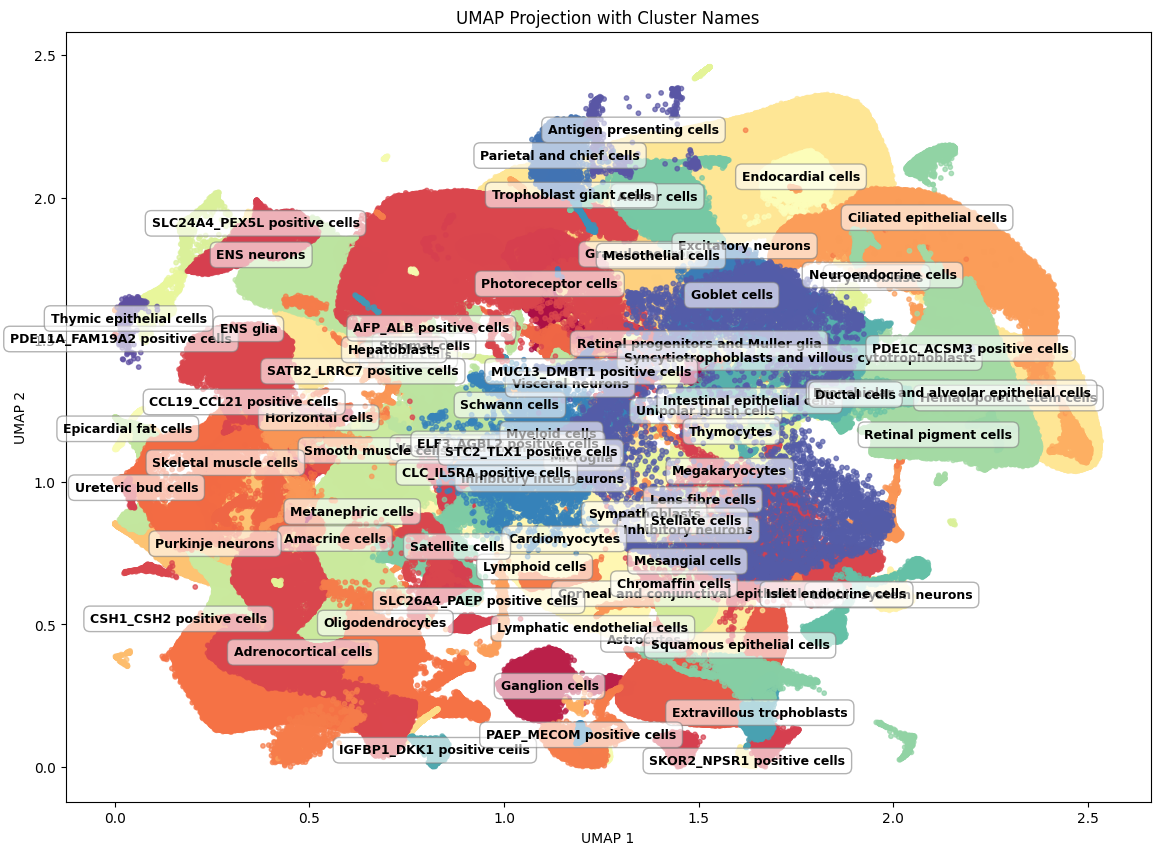

In [8]:
import matplotlib.pyplot as plt

# Open the loom file and extract UMAP coordinates and cluster names
with loompy.connect(loom_file) as ds:
    umap_1 = ds.ca["Main_cluster_umap_1"]
    umap_2 = ds.ca["Main_cluster_umap_2"]
    cluster_names = ds.ca["Main_cluster_name"]

    # Create a DataFrame for easier manipulation
    data = {
        "UMAP_1": umap_1,
        "UMAP_2": umap_2,
        "Cluster": cluster_names
    }
    df = pd.DataFrame(data)

# Define a color map for the clusters
cluster_colors = pd.factorize(df["Cluster"])[0]

# Plot the UMAP coordinates with improved clarity
plt.figure(figsize=(14, 10))
scatter = plt.scatter(df["UMAP_1"], df["UMAP_2"], c=cluster_colors, cmap='Spectral', alpha=0.7, s=10)
plt.title('UMAP Projection with Cluster Names')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

# Add text annotations for each cluster at the centroid
for cluster in df["Cluster"].unique():
    cluster_data = df[df["Cluster"] == cluster]
    centroid_x = cluster_data["UMAP_1"].mean()
    centroid_y = cluster_data["UMAP_2"].mean()
    plt.text(centroid_x, centroid_y, cluster, fontsize=9, weight='bold', ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray', boxstyle='round,pad=0.5'))

# Create a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().add_artist(legend1)

plt.show()

In [10]:
# Open the loom file and extract cluster names
with loompy.connect(loom_file) as ds:
    cluster_names = ds.ca["Main_cluster_name"]

# Create a pandas Series for easier manipulation
cluster_series = pd.Series(cluster_names)

# Get the unique cluster names and their counts
unique_clusters = cluster_series.value_counts()

# Display the unique clusters and their counts
print("Unique clusters and their counts:")
print(unique_clusters)

# Display the number of unique clusters
print("\nNumber of unique clusters:")
print(unique_clusters.count())

Unique clusters and their counts:
Excitatory neurons                           1258818
Inhibitory neurons                            350759
Adrenocortical cells                          328920
Astrocytes                                    318105
Granule neurons                               312675
                                              ...   
CSH1_CSH2 positive cells                         109
Corneal and conjunctival epithelial cells        104
CLC_IL5RA positive cells                         102
PDE1C_ACSM3 positive cells                        78
SLC26A4_PAEP positive cells                       68
Length: 77, dtype: int64

Number of unique clusters:
77


Right what I'm currently concerned regarding is that I have about 77 different clusters here. But in the ATACseq file, I only have ... 101 different types in the cicero peaks.

```bash
awk -F, 'NR==1{print NF-2}' cicero_coaccess_scores_by_cell_type.csv 
101
```

Now what i'm thinking is that I need to somehow link these together again. But for this I will first be looking at the papers more extensively... Seeing what they are doing. 